
## Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from math import log10

## Loading Data

In [4]:
monkeypox_df = pd.read_csv('monkeypox.csv')
covid_df = pd.read_csv('covid.csv')

### Display the first few rows of each dataframe to verify loading

In [5]:

print(covid_df.columns)
print(monkeypox_df.columns)



Index(['Date_reported', 'Country_code', 'Country', 'Continent', 'WHO_region',
       'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')
Index(['location', 'date', 'iso_code', 'total_cases', 'total_deaths',
       'new_cases', 'new_deaths', 'new_cases_smoothed', 'new_deaths_smoothed',
       'new_cases_per_million', 'total_cases_per_million',
       'new_cases_smoothed_per_million', 'new_deaths_per_million',
       'total_deaths_per_million', 'new_deaths_smoothed_per_million'],
      dtype='object')


## Data Preparation

In [35]:
cumulative_cases_covid_any_country = pd.DataFrame(covid_df.groupby('Date_reported')['New_cases'].sum())
cumulative_cases_monkeypox_any_country = pd.DataFrame(monkeypox_df.groupby('date')['new_cases'].sum())

cumulative_cases_covid_any_country['cumulative_cases'] = cumulative_cases_covid_any_country['New_cases'].cumsum().apply(lambda x: log10(x))
cumulative_cases_monkeypox_any_country['cumulative_cases'] = cumulative_cases_monkeypox_any_country['new_cases'].cumsum().apply(lambda x: log10(x))

cumulative_cases_covid_any_country.index = pd.to_datetime(cumulative_cases_covid_any_country.index)
cumulative_cases_monkeypox_any_country.index = pd.to_datetime(cumulative_cases_monkeypox_any_country.index)


## First Graphs

In [7]:
who_alert_covid = "30-01-2020"
who_alert_monkeypox = "14-08-2024"

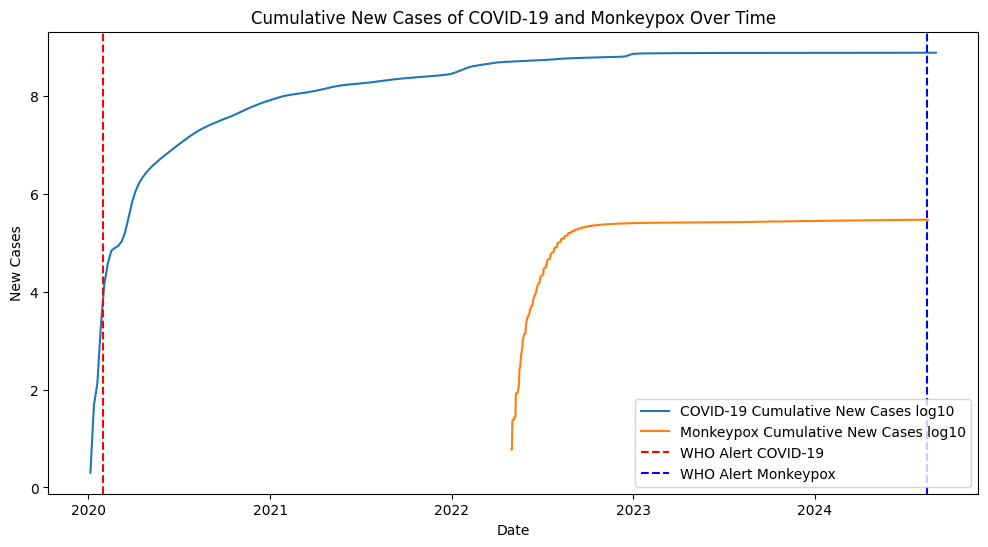

In [39]:
plt.figure(figsize=(12, 6))

plt.plot(cumulative_cases_covid_any_country.index, cumulative_cases_covid_any_country['cumulative_cases'], label='COVID-19 Cumulative New Cases log10')


plt.plot(cumulative_cases_monkeypox_any_country.index, cumulative_cases_monkeypox_any_country['cumulative_cases'], label='Monkeypox Cumulative New Cases log10')

plt.axvline(pd.to_datetime(who_alert_covid, dayfirst=True), color='red', linestyle='--', label='WHO Alert COVID-19')
plt.axvline(pd.to_datetime(who_alert_monkeypox, dayfirst=True), color='blue', linestyle='--', label='WHO Alert Monkeypox')

plt.title('Cumulative New Cases of COVID-19 and Monkeypox Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()

plt.show()

## TODO: Plot total cases on world map using GeoPandas